# 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [3]:
df_full = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(2)Сборный проект(золото)/gold_recovery_full.csv',index_col='date')
df_test = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(2)Сборный проект(золото)/gold_recovery_test.csv', index_col='date')
df_train = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(2)Сборный проект(золото)/gold_recovery_train.csv', index_col='date')

In [4]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [5]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

In [6]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

Загрузив данные, первым делом в глаза бросается множество признаков ,которые не присутствуют в тестовой выборке ( в других двух по 87 признаков ,а в тестовой 52 ). Также данные отсутствуют в разных признаках во всех выборкахи достаточно хаотично. Будем исследовать дальше !

In [7]:
#to calculate recovery by hand we need to make a temporary dataframe
df_train['recovery'] = 100*(df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))/(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))

In [8]:
df_temp = df_train.dropna(subset = ['recovery', 'rougher.output.recovery'])

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
mean_absolute_error(df_temp['rougher.output.recovery'],df_temp['recovery'])

1.0898633667227423e-14

После ручной проверки поняли ,что значение Recovery изначальное верное и не отличается от высчитанного в ручную по формуле 

In [10]:
different_columns = list(set(df_train.columns) - set(df_test.columns))

In [11]:
#11,21,22 indexes of the features we need to not to delete from features in df_train
#pd.Series(different_columns)
#different_columns.remove('recovery')
#different_columns.remove('rougher.output.recovery')
#different_columns.remove('final.output.recovery')


In [12]:
different_columns

['rougher.output.concentrate_pb',
 'rougher.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.tail_sol',
 'rougher.output.recovery',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_ag',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_ag',
 'rougher.output.concentrate_sol',
 'final.output.recovery',
 'final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_au',
 'rougher.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_pb',
 'primary_cl

Заметили ,что в тестовой выборке из признаков отсутсвуют признаки о выходном значении. По задаче говорилось ,что данные могли просто не успеть замериться на момент работы. Заметим ,что целевые признаки rougher.output.recovery  и final.output.recovery также отсутсвуют вовсе. Чтобы проверять эффективность предсказания модели - вытянем эти данные из полного датасета.Если встретим пропуски в целевой переменной rougher.output.recovery , то можем попробовать заполнить их по формуле ,так как из прошлых вычислений поняли ,что данные схожи и можно использовать данную формулу , а для final.output.recovery данные не известные , и где будем встречать пропуски - будем дропать данные строки

In [13]:
#df_train.drop(different_columns , axis = 1, inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

In [14]:
#adding to the test data columns with the target features from the full data set
df_test = df_test.merge(df_full[['final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

In [15]:
print(df_train['final.output.recovery'].isna().sum())
print(df_train['rougher.output.recovery'].isna().sum())

1521
2573


In [16]:
#dropping NaN's in target fetures
df_train = df_train.dropna(subset=['final.output.recovery'])
df_train = df_train.dropna(subset=['rougher.output.recovery'])

In [17]:
print(df_train['final.output.recovery'].isna().sum())
print(df_train['rougher.output.recovery'].isna().sum())

0
0


In [18]:
print(df_test['final.output.recovery'].isna().sum())
print(df_test['rougher.output.recovery'].isna().sum())

442
546


In [19]:
df_test = df_test.dropna(subset=['final.output.recovery'])
df_test = df_test.dropna(subset=['rougher.output.recovery'])

In [20]:
print(df_test['final.output.recovery'].isna().sum())
print(df_test['rougher.output.recovery'].isna().sum())

0
0


In [21]:
#filling NaNs in features with the previous values
df_test = df_test.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                             

Предобработали данных для последующего анализа. Удалили строки с пропусками в целевых переменных , так как это может сказаться больше всего на конечной эффективности модели. Для признаков заполняли предыдущим значением пропуски

# 2. Анализ данных

AU - ЗОЛОТО
<br>
AG - СЕРЕБРО
<br>
PB - СВИНЕЦ

In [24]:
#collecting data from each step of preprocessing concentrates
rougher_outputs = df_full[['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb']]

Text(0.5, 1.0, 'Концентрация после Флотации')

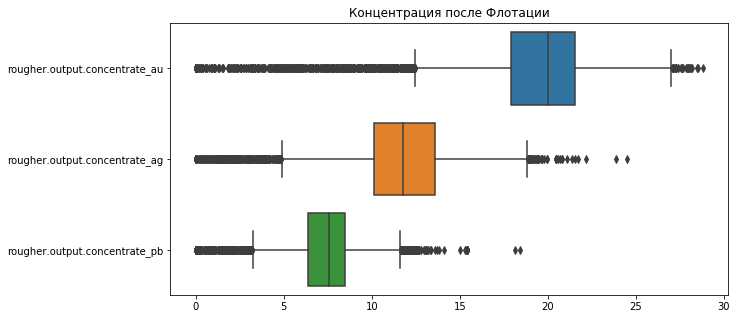

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data = rougher_outputs , orient = 'h').set_title('Концентрация после Флотации')

In [26]:
primary_outputs = df_full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']]

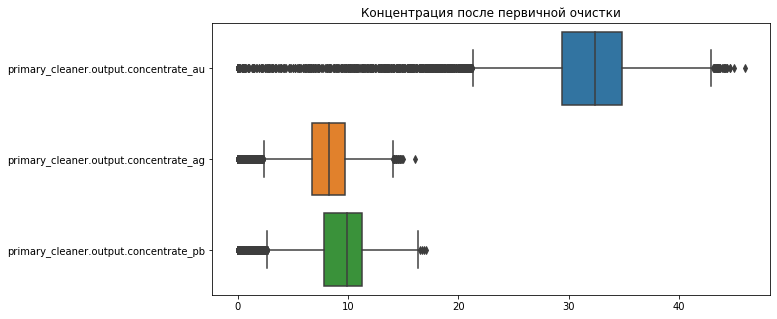

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data = primary_outputs , orient = 'h').set_title('Концентрация после первичной очистки');

In [28]:
final_outputs = df_full[['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']]

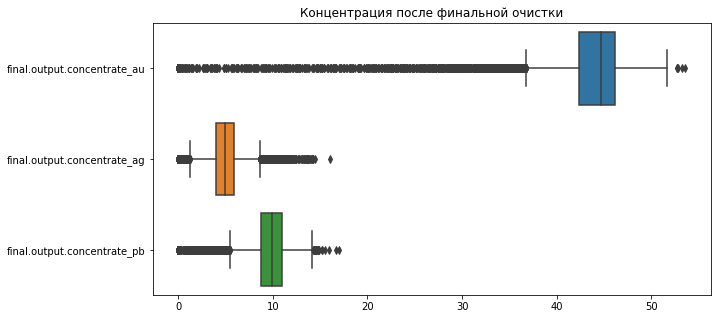

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data = final_outputs , orient = 'h').set_title('Концентрация после финальной очистки');

Заметили ,что после первичной очистки свинец повысил характеристику концентрации ,но на финальной очистке остался неизменным.
<br>
В случае с серебром же , после первичной очистки наблюдаем ,что концетрация вещества снизилась,а также снизилась и после финальной очистки.
<br>
А золото наоборот - с каждым этапом очистки становилось все лучше и лучше в плане концентрации вещества.
<br>
Таким образом все 3 металла ведут себя по-разному в результате их очистки

In [30]:
#input.feed_size

In [31]:
print('ФЛОТАЦИЯ, распределение на обучающей',df_train['rougher.input.feed_size'].mean())
print('ФЛОТАЦИЯ, распределение на тестовой',df_test['rougher.input.feed_size'].mean())

ФЛОТАЦИЯ, распределение на обучающей 60.23985599255735
ФЛОТАЦИЯ, распределение на тестовой 55.95275402889511


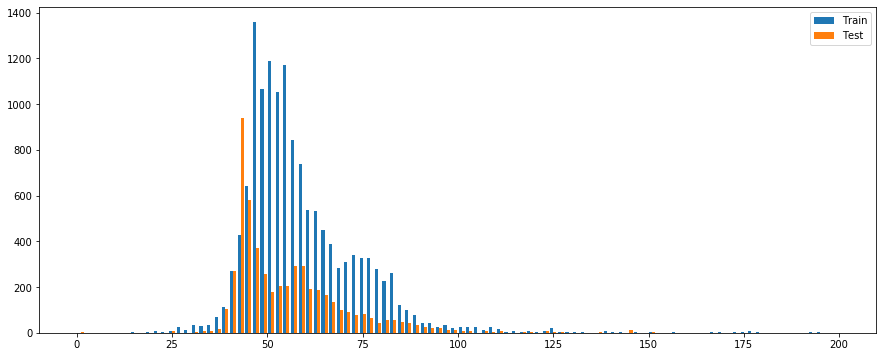

In [32]:
plt.figure(figsize=(15,6))
plt.hist([df_train['rougher.input.feed_size'],df_test['rougher.input.feed_size']],label =['Train','Test'], bins = 100,range = (0,200));
plt.legend();

In [33]:
print('Первичная очистка, распределение на обучающей',df_train['primary_cleaner.input.feed_size'].mean())
print('Первичная очистка,распределение на тестовой',df_test['primary_cleaner.input.feed_size'].mean())

Первичная очистка, распределение на обучающей 7.322309906901298
Первичная очистка,распределение на тестовой 7.266339191270909


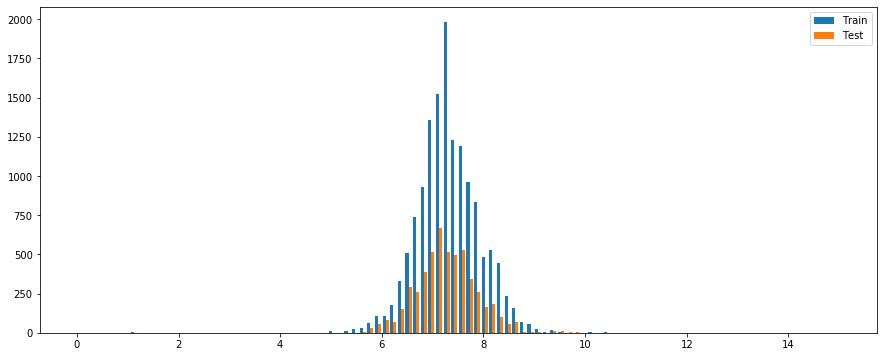

In [34]:
plt.figure(figsize=(15,6))
plt.hist([df_train['primary_cleaner.input.feed_size'],df_test['primary_cleaner.input.feed_size']],label =['Train','Test'], bins = 100,range = (0,15));
plt.legend();

Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации немного отличаются , но можно упустить это в силу разницы в размерах выборках , также в силу того,что среднее у них достаточно близки друг-к-другу
<br>
В случае же с первичной очистки ,то здесь распределение очень даже похожи и средние вовсе почти не отличаются , здесь однозначно можно говорить ,что они не отличаются

In [35]:
df_train['rougher_concetrates_sum'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_au'] \
+ df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']

In [36]:
df_train['primary_concetrates_sum'] = df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_au'] \
+ df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol']

In [37]:
df_train['final_concetrates_sum'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_au'] \
+ df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']

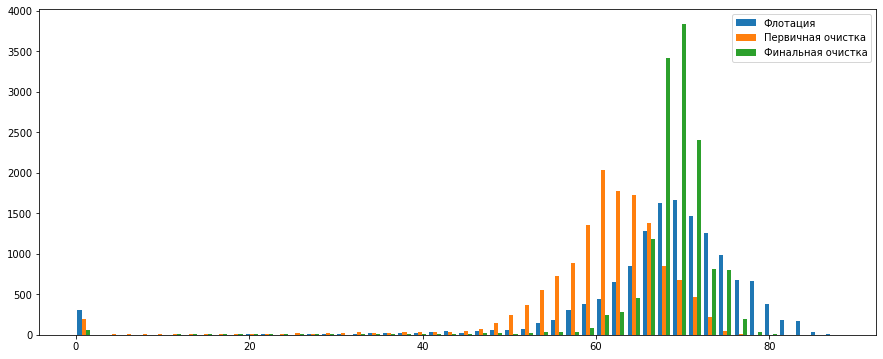

In [38]:
plt.figure(figsize=(15,6))
plt.hist([df_train['rougher_concetrates_sum'],df_train['primary_concetrates_sum'],df_train['final_concetrates_sum']], bins = 50, 
          label=['Флотация','Первичная очистка', 'Финальная очистка']);
plt.legend();

In [39]:
df_train = df_train[(df_train['rougher_concetrates_sum'] > 40) & (df_train['primary_concetrates_sum'] > 40) & (df_train['final_concetrates_sum'] > 40)]

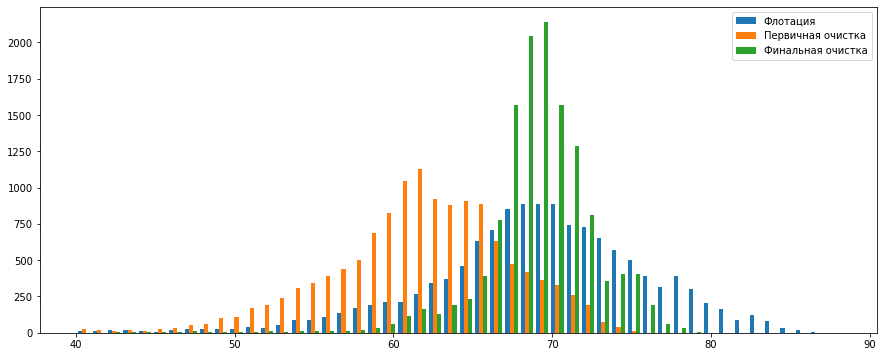

In [40]:
plt.figure(figsize=(15,6))
plt.hist([df_train['rougher_concetrates_sum'],df_train['primary_concetrates_sum'],df_train['final_concetrates_sum']], bins = 50, 
          label=['Флотация','Первичная очистка', 'Финальная очистка']);
plt.legend();

До 40 данных мало , и в хвосте также можно увидеть выбросы , поэтому откинем данные ,где в сумме дает меньше 40

# 3. Модель

In [69]:
def smape(target,prediction):
    sum_rougher = 0
    sum_final = 0
    for i in range(len(prediction)):
        sum_rougher += abs(target['rougher.output.recovery'][i] - prediction[i][0])/((abs(target['rougher.output.recovery'][i]) + abs(prediction[i][0]))/2)*100
        
        sum_final +=abs(target['final.output.recovery'][i] - prediction[i][1])/((abs(target['final.output.recovery'][i]) + abs(prediction[i][1]))/2)*100
    smape_rougher = sum_rougher/len(prediction)
    
    smape_final = sum_final/len(prediction)
    
    smape_combined = 0.25*smape_rougher + 0.75*smape_final
    
    return smape_combined

In [70]:
different_columns = list(set(df_train.columns) - set(df_test.columns))

In [71]:
df_train.drop(different_columns, axis=1, inplace = True)

In [72]:
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)

In [73]:
score = make_scorer(smape)

In [74]:
modelLR = LinearRegression()
modelLR.fit(target_train, features_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
scoreLR = cross_val_score(modelLR, features_train, target_train, cv=5, scoring=score)
scoreLR.mean()

10.040184001413287

In [80]:
%%time
best = 1000
d = 0
s = 0
for depth in range(4,20,2):
    for samples in range(2, 11,2):
        modelDTR = DecisionTreeRegressor(max_depth = depth,min_samples_leaf = samples, random_state = 42)
        scoreDTR = cross_val_score(modelDTR, features_train, target_train, cv=5, scoring = score).mean()
        if scoreDTR < best:
            best = scoreDTR
            d = depth
            s = samples
print('The best sMAPE for Decision Tree:', best, 'with depth =', d, 'and samples = ', s)

The best sMAPE for Decision Tree: 8.941362881313623 with depth = 4 and samples =  2
CPU times: user 2min 13s, sys: 766 ms, total: 2min 14s
Wall time: 2min 23s


In [81]:
%%time
best = 1000
d = 0
e = 0
for depth in range(1,16,2):
    for estim in range(1,30,2):
        modelRFR = RandomForestRegressor(max_depth = depth, n_estimators = estim, random_state = 42)
        scoreRFR = cross_val_score(modelRFR, features_train, target_train, cv=5, scoring = score).mean()
        if scoreRFR < best:
            best = scoreRFR
            d = depth
            e = estim
print('The best sMAPE for Random Forest:', best, 'with depth =', d, 'and estimators = ', e)

The best sMAPE for Random Forest: 8.618658471621647 with depth = 3 and estimators =  17
CPU times: user 33min 24s, sys: 7.12 s, total: 33min 31s
Wall time: 34min 11s


In [83]:
modelDTR = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, random_state = 42)
modelDTR.fit(features_train, target_train)
predictionDTR = modelDTR.predict(features_test)
smape(target_test, predictionDTR)

12.34554865843099

In [84]:
modelRFR = RandomForestRegressor(max_depth = 3, n_estimators = 17, random_state = 42)
modelRFR.fit(features_train,target_train)
predictionRFR = modelRFR.predict(features_test)
smape(target_test, predictionRFR)

9.604768252098463

Также сделаем проверку на адекватность ,где сделаем предсказание среднего чтобы посмотреть относительную оценку лучшей модели , от предсказания среднего

In [88]:
constant_model = target_test[['rougher.output.recovery','final.output.recovery']]
constant_model['rougher.output.recovery'] = target_train['rougher.output.recovery'].mean()
constant_model['final.output.recovery'] = target_train['final.output.recovery'].mean()
smape(target_test,constant_model.to_numpy())

9.81779617047321

В итоге лучше всего показала себя модель Случайный Лес с sMAPE = 9.6 , и единственная модель которая прошла проверку на адекватность относительно предсказания среднего. Линейная регрессия показала неплохие результаты , но они хуже среднего. Дерево решений , видимо переобучилось и показала очень плохие результаты на тестовых данных.